# CNN(합성곱신경망) - 영상분류기
- 흑백 영상 데이터 분류
- 컬러 영상 데이터 분류
- ex) 정보추출, 문장분류(텍스트 분류), 얼굴 인식 등

: 데이터의 특징을 추출해 특징들의 패턴 파악

Convolution 과정과 Pooling과정으로 진행
(Convolution Layer와 Pooling Layer 복합구성)

```
Convolution 
: 데이터에 인접한 성분들을 조사해 특징 파악, 파악된 특징을 한장으로 도출 (Convolution Layer : 도출된 장)
압축과정으로 파라미터의 개수 줄여주는 역할
```
```
Pooling
: Convolution 과정 거친 레이어의 사이즈 줄여줌
단순히 데이터 사이즈 줄여주고, 노이즈 상쇄
미세한 부분의 일관적인 특징제공
```


## 데이터 준비

In [ ]:
!pip install -q tensorflow-datasets tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

ds = tfds.load('beans', split = 'train', shuffle_files=True)

In [ ]:
data = next(ds.batch(9999999).as_numpy_iterator())
image, label = data['image'], data['label']
print(image.shape)
print(label.shape)

(1034, 500, 500, 3)
(1034,)


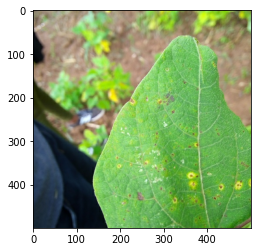

[1 1 0 ... 0 0 0]


In [ ]:
plt.imshow(image[0])
plt.show()
print(label)

## CIFAR10 데이터
refered https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

In [ ]:
i  = int(len(image)*0.8)

raw_train_x, raw_test_x = image[:i], image[i:]
raw_train_y, raw_test_y = label[:i], label[i:]

In [ ]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

(827, 500, 500, 3)
(827,)
(207, 500, 500, 3)
(207,)


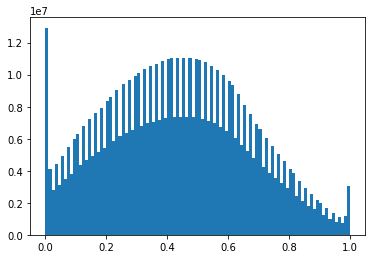

In [ ]:
plt.hist(train_x.flatten(), bins=100)
plt.show()

0 A


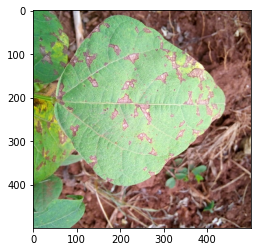

1 B


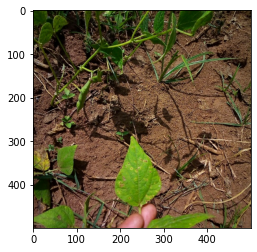

1 B


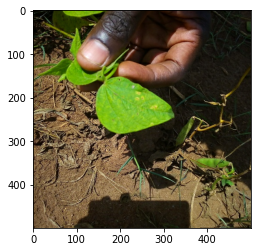

1 B


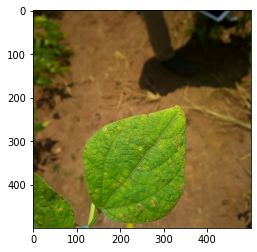

In [ ]:
labels = ['A', 'B', 'C']
def show_sample(i):
  # print(raw_train_y[i][0], labels[raw_train_y[i][0]]) -> 1차원 데이터
  print(raw_train_y[i], labels[raw_train_y[i]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
model = keras.Sequential()
model.add(Input((500,500,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=32)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1000000)           0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
model = keras.Sequential()
model.add(Input((500,500,3)))
# 학습을 늘려줌
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# dense차이를 줄여주기위해 10->256으로 늘려줌
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=32)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 500, 500, 32)      2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 500, 500, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 250, 250, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 250, 250, 64)      51264     
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 64)      102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                  